In [1]:
from mtcnn.mtcnn import MTCNN
from keras_facenet import FaceNet

face_detector = MTCNN()
MyFaceNet = FaceNet()

In [3]:
def create_signature(directory):
    signatures = list()
    
    for filename in listdir(directory):
        img_path = os.path.join(directory, filename)
        gbr1 = cv2.imread(img_path)
        
        wajah = face_detector.detect_faces(gbr1)
        
        if len(wajah)>0:
             for face1 in wajah:
                x1, y1, width, height = face1['box']
                x1, y1 = abs(x1), abs(y1)
                x2, y2 = x1 + width, y1 + height


                # Extract facial landmarks
                facial_landmarks = face1['keypoints']
                left_eye = facial_landmarks['left_eye']
                right_eye = facial_landmarks['right_eye']
                nose = facial_landmarks['nose']
                mouth_left = facial_landmarks['mouth_left']
                mouth_right = facial_landmarks['mouth_right']

                # Draw facial landmarks on the image
                cv2.circle(gbr1, left_eye, 5, (0, 0, 255), -1)
                cv2.circle(gbr1, right_eye, 5, (0, 0, 255), -1)
                cv2.circle(gbr1, nose, 5, (0, 0, 255), -1)
                cv2.circle(gbr1, mouth_left, 5, (0, 0, 255), -1)
                cv2.circle(gbr1, mouth_right, 5, (0, 0, 255), -1)


                # crop and resize the face
                gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
                gbr = Image.fromarray(gbr)
                gbr_array = asarray(gbr)

                face = gbr_array[y1:y2, x1:x2]
                face = Image.fromarray(face)
                face = face.resize((160,160))
                face = asarray(face)

            
                face = expand_dims(face, axis=0)
                signature = MyFaceNet.embeddings(face)

                signatures.append(signature)
        
    return signatures


In [4]:
def load_dataset(directory):
    X,y = list(), list()
    
    for subdir in listdir(directory):
        path = directory + subdir + '/'
        
        if not isdir(path):
            continue
            
        signatures = create_signature(path)
        labels = [subdir for _ in range(len(signatures))]
        
        X.extend(signatures)
        y.extend(labels)
        
    return asarray(X), asarray(y)

In [6]:
import os
from os import listdir
from os.path import isdir
import cv2
from PIL import Image
from numpy import asarray
from numpy import expand_dims

# load train dataset
trainX, trainy = load_dataset('RAF-DB/Train/')
print(trainX.shape, trainy.shape)
# load valid dataset
valX, valy = load_dataset('RAF-DB/Val/')
print(valX.shape, valy.shape)



1/1 [==============================] - 0s 177ms/step
(485, 1, 512) (485,)
1/1 [==============================] - 0s 219ms/step
(118, 1, 512) (118,)


In [7]:
trainX.shape

(485, 1, 512)

In [8]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

trainX=np.squeeze(trainX, axis=1)  
valX=np.squeeze(valX, axis=1)  

encoder = LabelEncoder()
encoder.fit(trainy)
encoded_Y = encoder.transform(trainy)

train_y = to_categorical(encoded_Y)

encoder = LabelEncoder()
encoder.fit(valy)
encoded_Y = encoder.transform(valy)

val_y = to_categorical(encoded_Y)



In [10]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input

model = keras.Sequential()

model.add(layers.Dense(30, input_dim=512, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

In [11]:
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from keras.models import Model
from keras.models import load_model
from keras.layers import Input


opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['acc'])

In [12]:
history = model.fit(trainX, train_y, epochs=100, batch_size=64, validation_data=(valX, val_y), verbose=1)

Epoch 1/100
8/8 [==============================] - 8s 82ms/step - loss: 1.9438 - acc: 0.1835 - val_loss: 1.9372 - val_acc: 0.2797
Epoch 2/100
8/8 [==============================] - 0s 24ms/step - loss: 1.9303 - acc: 0.2990 - val_loss: 1.9243 - val_acc: 0.2797
Epoch 3/100
8/8 [==============================] - 0s 23ms/step - loss: 1.9148 - acc: 0.3320 - val_loss: 1.9059 - val_acc: 0.3390
Epoch 4/100
8/8 [==============================] - 0s 22ms/step - loss: 1.8941 - acc: 0.3773 - val_loss: 1.8806 - val_acc: 0.3729
Epoch 5/100
8/8 [==============================] - 0s 24ms/step - loss: 1.8670 - acc: 0.4103 - val_loss: 1.8520 - val_acc: 0.4237
Epoch 6/100
8/8 [==============================] - 0s 26ms/step - loss: 1.8331 - acc: 0.4412 - val_loss: 1.8175 - val_acc: 0.4153
Epoch 7/100
8/8 [==============================] - 0s 22ms/step - loss: 1.7928 - acc: 0.4598 - val_loss: 1.7777 - val_acc: 0.3983
Epoch 8/100
8/8 [==============================] - 0s 25ms/step - loss: 1.7435 - acc: 0.45

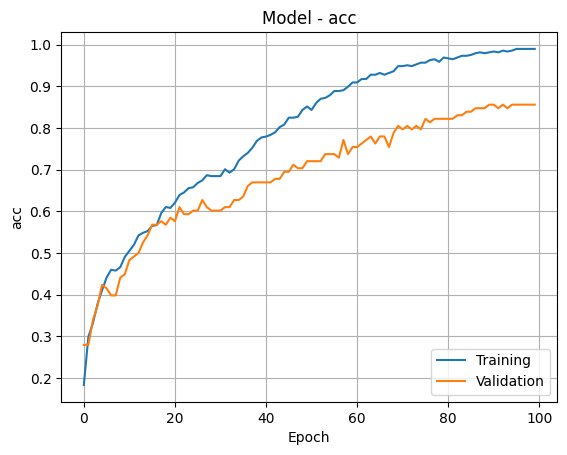

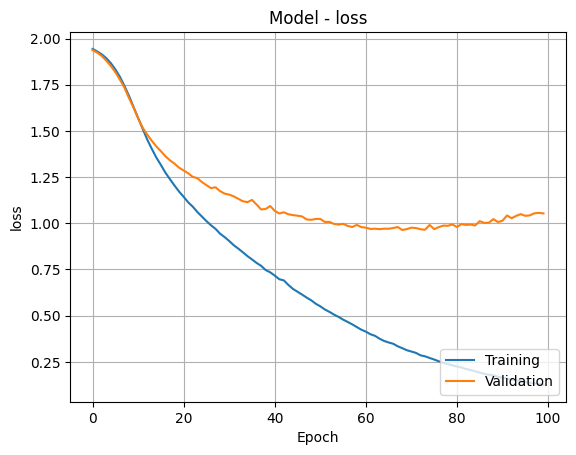

In [13]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

def evaluate_model_(history):
    names = [['acc', 'val_acc'], 
                 ['loss', 'val_loss']]
    for name in names :
        fig1, ax_acc = plt.subplots()
        plt.plot(history.history[name[0]])
        plt.plot(history.history[name[1]])
       
        plt.xlabel('Epoch')
        plt.ylabel(name[0])
        plt.title('Model - ' + name[0])
        plt.legend(['Training', 'Validation'], loc='lower right')
        plt.grid()
        plt.show()
        
evaluate_model_(history)

In [14]:
model.save('MODEL_BARU14.h5' )

c:\Users\user\anaconda3\envs\FaceNet2\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
